## 신은총 

### Dependency

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [362]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

### 1 . 

In [7]:
# 1)
np.arange(0,5,0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [11]:
#2)
np.arange(1,11).reshape(2,5)

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [14]:
#3)
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [16]:
#4)
np.ones((4,4))

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [19]:
np.arange(1,24,2).reshape(3,4)

array([[ 1,  3,  5,  7],
       [ 9, 11, 13, 15],
       [17, 19, 21, 23]])

### 2.

In [28]:
pd.set_option("display.precision", 4)

data = {
    "2015": [9904312, 3448737, 2890451, 2466052],
    "2010": [9631482, 3393191, 2632035, 2431774],
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상권"]
}
columns = ["지역", "2015", "2010", "2005", "2000"]
index = ["서울", "부산", "인천", "대구"]
df = pd.DataFrame(data, index=index, columns=columns)
df

,지역,2015,2010,2005,2000
서울,수도권,9904312,9631482,9762546,9853972
부산,경상권,3448737,3393191,3512547,3655437
인천,수도권,2890451,2632035,2517680,2466338
대구,경상권,2466052,2431774,2456016,2473990


In [29]:
df['2010 - 2015 증가율'] = 1 - df['2010']/df['2015']

In [30]:
df

,지역,2015,2010,2005,2000,2010 - 2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0275
부산,경상권,3448737,3393191,3512547,3655437,0.0161
인천,수도권,2890451,2632035,2517680,2466338,0.0894
대구,경상권,2466052,2431774,2456016,2473990,0.0139


### 3.

In [59]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [39]:
#1)

#성별
titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [41]:
# 선실별
titanic['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [42]:
# 사망/생존
titanic.alive.value_counts()

no     549
yes    342
Name: alive, dtype: int64

In [43]:
#2)

bins = [1, 15, 25, 35, 60, 99]
labels = ["미성년자", "청년", "중년", "장년", "노년"]

In [60]:
titanic['gen'] = pd.cut(titanic.age, bins, labels=labels)
# titanic.dropna(inplace = True)

In [65]:
rate = titanic.gen.value_counts()/sum(titanic.gen.value_counts())
rate

청년      0.3114
중년      0.2800
장년      0.2786
미성년자    0.0986
노년      0.0314
Name: gen, dtype: float64

### 4.

In [66]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [69]:
#1)
pd.set_option("display.precision", 2)

tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.06
1,10.34,1.66,Male,No,Sun,Dinner,3,0.16
2,21.01,3.50,Male,No,Sun,Dinner,3,0.17
3,23.68,3.31,Male,No,Sun,Dinner,2,0.14
4,24.59,3.61,Female,No,Sun,Dinner,4,0.15


In [70]:
tips.pivot_table('tip_pct', 'day')

,tip_pct
day,
Thur,0.16
Fri,0.17
Sat,0.15
Sun,0.17


### 5.

In [71]:
import sqlite3

In [101]:
conn = sqlite3.connect('test.db') # 파일 DB 접속
cur = conn.cursor()

In [102]:
#1)
cur.execute('CREATE TABLE IF NOT EXISTS Eagles (back_no INT NOT NULL,name TEXT,position TEXT,PRIMARY KEY(back_no));')
conn.commit()

In [103]:
# 2)
sql = "insert into Eagles(back_no,name,position) values (?, ?, ?)"
cur.execute(sql, (1, '홍길동', '투수'))
cur.execute(sql, (8, '정근우', '내야수'))
cur.execute(sql, (4, '박진원', '볼보이'))
cur.execute(sql, (11, '파이썬', '일루수'))
cur.execute(sql, (17, '쥬피터', '삼루수'))
conn.commit()

In [104]:
# 3)
cur = conn.cursor()
cur.execute('SELECT * FROM Eagles')
rows = cur.fetchall()
rows

[(1, '홍길동', '투수'),
 (8, '정근우', '내야수'),
 (4, '박진원', '볼보이'),
 (11, '파이썬', '일루수'),
 (17, '쥬피터', '삼루수')]

In [105]:
#4)

cur.execute("UPDATE Eagles SET position=? WHERE back_no=?;",('외야수',8))

cur.execute('SELECT * FROM Eagles')
rows = cur.fetchall()
rows

[(1, '홍길동', '투수'),
 (8, '정근우', '외야수'),
 (4, '박진원', '볼보이'),
 (11, '파이썬', '일루수'),
 (17, '쥬피터', '삼루수')]

In [106]:
#5)

cur.execute('SELECT MAX(back_no) FROM Eagles')
del_no = cur.fetchone()[0]

In [107]:
del_no

17

In [ ]:
cur.execute("DELETE FROM Eagles WHERE back_no=17;")

In [110]:
cur.execute('SELECT * FROM Eagles')
cur.fetchall()

[(1, '홍길동', '투수'), (8, '정근우', '외야수'), (4, '박진원', '볼보이'), (11, '파이썬', '일루수')]

In [109]:
rows = cur.fetchall()
rows

[]

### 6.

In [111]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [114]:
x = np.arange(-3,4)
y = sigmoid(x)

Text(0.5, 1.0, 'Sigmoid x PLOT')

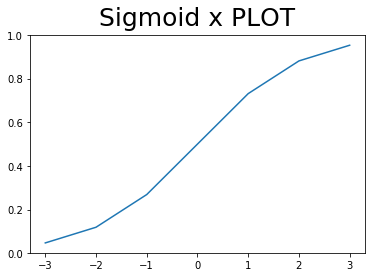

In [124]:
plt.plot(x,y)
plt.title("Sigmoid x PLOT",{'fontsize':25}, pad=10)

### 7.


1) ```gradient descent```
  
2) ```learning rate```
  
3) ```노드```  
  
4) ```relu```  
  
5) ```layer```  


### 8.

In [134]:
iris = sns.load_dataset("iris")

In [140]:
df = iris.sample(frac=1)
dataset = df.values

In [148]:
X = dataset[:,:4]
Y = dataset[:,4]

In [152]:
label_encoder = LabelEncoder()

In [154]:
integer_encoded = label_encoder.fit_transform(Y)

In [190]:
# versicolor = 1, virginica = 2, setosa = 0

In [156]:
encoded_Y = to_categorical(integer_encoded)

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.33, random_state=100)

In [229]:
# build model

In [230]:
model = Sequential()
model.add(Dense(units=8, activation='relu', input_dim=4))
model.add(BatchNormalization())
model.add(Dense(units=16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.002),loss='categorical_crossentropy',  metrics=['accuracy'])

In [231]:
model.fit(x=X_train,y=y_train, batch_size=32, epochs=200,validation_data=(X_test, y_test))

Train on 100 samples, validate on 50 samples
Epoch 1/200
100/100 [==============================] - 0s 2ms/sample - loss: 0.9275 - acc: 0.3300 - val_loss: 1.1722 - val_acc: 0.3400
Epoch 2/200
100/100 [==============================] - 0s 156us/sample - loss: 0.8524 - acc: 0.3400 - val_loss: 1.1620 - val_acc: 0.3400
Epoch 3/200
100/100 [==============================] - 0s 0s/sample - loss: 0.7758 - acc: 0.4700 - val_loss: 1.1539 - val_acc: 0.0800
Epoch 4/200
100/100 [==============================] - 0s 216us/sample - loss: 0.7550 - acc: 0.6500 - val_loss: 1.1462 - val_acc: 0.0000e+00
Epoch 5/200
100/100 [==============================] - 0s 80us/sample - loss: 0.7270 - acc: 0.7500 - val_loss: 1.1386 - val_acc: 0.0000e+00
Epoch 6/200
100/100 [==============================] - 0s 90us/sample - loss: 0.7057 - acc: 0.7800 - val_loss: 1.1317 - val_acc: 0.0400
Epoch 7/200
100/100 [==============================] - 0s 110us/sample - loss: 0.7051 - acc: 0.8000 - val_loss: 1.1263 - val_acc: 0.

100/100 [==============================] - 0s 80us/sample - loss: 0.1114 - acc: 0.9800 - val_loss: 0.2488 - val_acc: 0.9400
Epoch 61/200
100/100 [==============================] - 0s 100us/sample - loss: 0.1260 - acc: 0.9400 - val_loss: 0.2562 - val_acc: 0.9000
Epoch 62/200
100/100 [==============================] - 0s 80us/sample - loss: 0.1203 - acc: 0.9700 - val_loss: 0.2660 - val_acc: 0.9000
Epoch 63/200
100/100 [==============================] - 0s 80us/sample - loss: 0.0986 - acc: 0.9700 - val_loss: 0.2688 - val_acc: 0.8800
Epoch 64/200
100/100 [==============================] - 0s 90us/sample - loss: 0.1065 - acc: 0.9700 - val_loss: 0.2707 - val_acc: 0.8800
Epoch 65/200
100/100 [==============================] - 0s 80us/sample - loss: 0.1961 - acc: 0.9300 - val_loss: 0.2713 - val_acc: 0.8800
Epoch 66/200
100/100 [==============================] - 0s 110us/sample - loss: 0.0955 - acc: 0.9700 - val_loss: 0.2768 - val_acc: 0.8800
Epoch 67/200
100/100 [==============================

100/100 [==============================] - 0s 90us/sample - loss: 0.1042 - acc: 0.9500 - val_loss: 0.1678 - val_acc: 0.9200
Epoch 120/200
100/100 [==============================] - 0s 90us/sample - loss: 0.0789 - acc: 0.9800 - val_loss: 0.1623 - val_acc: 0.9200
Epoch 121/200
100/100 [==============================] - 0s 100us/sample - loss: 0.1055 - acc: 0.9500 - val_loss: 0.1547 - val_acc: 0.9200
Epoch 122/200
100/100 [==============================] - 0s 90us/sample - loss: 0.0762 - acc: 0.9700 - val_loss: 0.1349 - val_acc: 0.9200
Epoch 123/200
100/100 [==============================] - 0s 120us/sample - loss: 0.0557 - acc: 1.0000 - val_loss: 0.1323 - val_acc: 0.9200
Epoch 124/200
100/100 [==============================] - 0s 70us/sample - loss: 0.0950 - acc: 0.9700 - val_loss: 0.1351 - val_acc: 0.9200
Epoch 125/200
100/100 [==============================] - 0s 90us/sample - loss: 0.1080 - acc: 0.9600 - val_loss: 0.1407 - val_acc: 0.9200
Epoch 126/200
100/100 [=======================

100/100 [==============================] - 0s 80us/sample - loss: 0.1043 - acc: 0.9400 - val_loss: 0.0490 - val_acc: 1.0000
Epoch 179/200
100/100 [==============================] - 0s 80us/sample - loss: 0.0784 - acc: 0.9800 - val_loss: 0.0482 - val_acc: 1.0000
Epoch 180/200
100/100 [==============================] - 0s 70us/sample - loss: 0.0837 - acc: 0.9800 - val_loss: 0.0485 - val_acc: 1.0000
Epoch 181/200
100/100 [==============================] - 0s 90us/sample - loss: 0.0747 - acc: 0.9800 - val_loss: 0.0475 - val_acc: 1.0000
Epoch 182/200
100/100 [==============================] - 0s 70us/sample - loss: 0.0922 - acc: 0.9800 - val_loss: 0.0470 - val_acc: 1.0000
Epoch 183/200
100/100 [==============================] - 0s 80us/sample - loss: 0.1240 - acc: 0.9500 - val_loss: 0.0467 - val_acc: 1.0000
Epoch 184/200
100/100 [==============================] - 0s 80us/sample - loss: 0.0785 - acc: 0.9700 - val_loss: 0.0458 - val_acc: 1.0000
Epoch 185/200
100/100 [=========================

In [232]:
print("\n Accuracy: %.4f" % (model.evaluate(X_train, y_train)[1]))

100/100 [==============================] - 0s 40us/sample - loss: 0.0690 - acc: 0.9800

 Accuracy: 0.9800


In [233]:
prediction = model.predict(X_test)

In [239]:
model.evaluate(X_test,y_test)

50/50 [==============================] - 0s 312us/sample - loss: 0.0423 - acc: 1.0000


[0.04233562231063843, 1.0]

### 9.

In [300]:
pre_df = pd.read_csv('pima-indians-diabetes.csv',header=None)

In [301]:
pre_df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.63,50,1
1,1,85,66,29,0,26.6,0.35,31,0
2,8,183,64,0,0,23.3,0.67,32,1
3,1,89,66,23,94,28.1,0.17,21,0
4,0,137,40,35,168,43.1,2.29,33,1


In [302]:
shuffled_df = pre_df.sample(frac=1)
dataset = shuffled_df.values

In [303]:
X = dataset[:,:8]
Y = dataset[:,8]

In [304]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=100)

In [353]:
model = Sequential()
model.add(Dense(units=12, activation='relu', input_dim=8))
model.add(BatchNormalization())

model.add(Dense(units=8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',  metrics=['accuracy'])

In [354]:
hist = model.fit(x=X_train,y=y_train, batch_size=64, epochs=500,validation_data=(X_test, y_test))

Train on 576 samples, validate on 192 samples
Epoch 1/500
576/576 [==============================] - 1s 2ms/sample - loss: 0.9901 - acc: 0.4826 - val_loss: 1.8354 - val_acc: 0.3594
Epoch 2/500
576/576 [==============================] - 0s 27us/sample - loss: 0.8719 - acc: 0.4913 - val_loss: 1.4621 - val_acc: 0.3646
Epoch 3/500
576/576 [==============================] - 0s 44us/sample - loss: 0.8037 - acc: 0.5365 - val_loss: 1.3069 - val_acc: 0.3646
Epoch 4/500
576/576 [==============================] - 0s 42us/sample - loss: 0.7515 - acc: 0.5503 - val_loss: 1.2128 - val_acc: 0.3646
Epoch 5/500
576/576 [==============================] - 0s 38us/sample - loss: 0.7157 - acc: 0.5972 - val_loss: 1.1359 - val_acc: 0.3646
Epoch 6/500
576/576 [==============================] - 0s 42us/sample - loss: 0.6732 - acc: 0.6597 - val_loss: 1.0686 - val_acc: 0.3646
Epoch 7/500
576/576 [==============================] - 0s 36us/sample - loss: 0.6529 - acc: 0.6840 - val_loss: 1.0097 - val_acc: 0.3594
Epo

576/576 [==============================] - 0s 40us/sample - loss: 0.4590 - acc: 0.7708 - val_loss: 0.4849 - val_acc: 0.7656
Epoch 61/500
576/576 [==============================] - 0s 45us/sample - loss: 0.4532 - acc: 0.7865 - val_loss: 0.4731 - val_acc: 0.7656
Epoch 62/500
576/576 [==============================] - 0s 36us/sample - loss: 0.4555 - acc: 0.7726 - val_loss: 0.4748 - val_acc: 0.7656
Epoch 63/500
576/576 [==============================] - 0s 42us/sample - loss: 0.4411 - acc: 0.7882 - val_loss: 0.4793 - val_acc: 0.7604
Epoch 64/500
576/576 [==============================] - 0s 36us/sample - loss: 0.4397 - acc: 0.7882 - val_loss: 0.4786 - val_acc: 0.7552
Epoch 65/500
576/576 [==============================] - 0s 36us/sample - loss: 0.4525 - acc: 0.7812 - val_loss: 0.4789 - val_acc: 0.7500
Epoch 66/500
576/576 [==============================] - 0s 38us/sample - loss: 0.4513 - acc: 0.7951 - val_loss: 0.4777 - val_acc: 0.7552
Epoch 67/500
576/576 [==============================] 

Epoch 120/500
576/576 [==============================] - 0s 38us/sample - loss: 0.4404 - acc: 0.7986 - val_loss: 0.4773 - val_acc: 0.7604
Epoch 121/500
576/576 [==============================] - 0s 33us/sample - loss: 0.4387 - acc: 0.7847 - val_loss: 0.4755 - val_acc: 0.7500
Epoch 122/500
576/576 [==============================] - 0s 36us/sample - loss: 0.4253 - acc: 0.7934 - val_loss: 0.4755 - val_acc: 0.7708
Epoch 123/500
576/576 [==============================] - 0s 38us/sample - loss: 0.4305 - acc: 0.7917 - val_loss: 0.4750 - val_acc: 0.7604
Epoch 124/500
576/576 [==============================] - 0s 33us/sample - loss: 0.4231 - acc: 0.7951 - val_loss: 0.4742 - val_acc: 0.7604
Epoch 125/500
576/576 [==============================] - 0s 36us/sample - loss: 0.4350 - acc: 0.7951 - val_loss: 0.4782 - val_acc: 0.7708
Epoch 126/500
576/576 [==============================] - 0s 35us/sample - loss: 0.4356 - acc: 0.7899 - val_loss: 0.4765 - val_acc: 0.7656
Epoch 127/500
576/576 [===========

576/576 [==============================] - 0s 40us/sample - loss: 0.4139 - acc: 0.8056 - val_loss: 0.4965 - val_acc: 0.7344
Epoch 180/500
576/576 [==============================] - 0s 38us/sample - loss: 0.4085 - acc: 0.8142 - val_loss: 0.4934 - val_acc: 0.7500
Epoch 181/500
576/576 [==============================] - 0s 45us/sample - loss: 0.4165 - acc: 0.8125 - val_loss: 0.4968 - val_acc: 0.7604
Epoch 182/500
576/576 [==============================] - 0s 38us/sample - loss: 0.4241 - acc: 0.7830 - val_loss: 0.4990 - val_acc: 0.7552
Epoch 183/500
576/576 [==============================] - 0s 35us/sample - loss: 0.4209 - acc: 0.8021 - val_loss: 0.5011 - val_acc: 0.7396
Epoch 184/500
576/576 [==============================] - 0s 42us/sample - loss: 0.4099 - acc: 0.8021 - val_loss: 0.5006 - val_acc: 0.7448
Epoch 185/500
576/576 [==============================] - 0s 30us/sample - loss: 0.4149 - acc: 0.8090 - val_loss: 0.4963 - val_acc: 0.7448
Epoch 186/500
576/576 [=========================

576/576 [==============================] - 0s 36us/sample - loss: 0.4141 - acc: 0.7969 - val_loss: 0.5070 - val_acc: 0.7344
Epoch 239/500
576/576 [==============================] - 0s 47us/sample - loss: 0.4103 - acc: 0.7951 - val_loss: 0.5082 - val_acc: 0.7396
Epoch 240/500
576/576 [==============================] - 0s 36us/sample - loss: 0.4002 - acc: 0.8038 - val_loss: 0.5126 - val_acc: 0.7396
Epoch 241/500
576/576 [==============================] - 0s 38us/sample - loss: 0.4013 - acc: 0.8160 - val_loss: 0.5148 - val_acc: 0.7396
Epoch 242/500
576/576 [==============================] - 0s 35us/sample - loss: 0.4048 - acc: 0.8177 - val_loss: 0.5124 - val_acc: 0.7396
Epoch 243/500
576/576 [==============================] - 0s 38us/sample - loss: 0.4126 - acc: 0.7934 - val_loss: 0.5078 - val_acc: 0.7292
Epoch 244/500
576/576 [==============================] - 0s 40us/sample - loss: 0.4092 - acc: 0.7899 - val_loss: 0.5037 - val_acc: 0.7240
Epoch 245/500
576/576 [=========================

576/576 [==============================] - 0s 36us/sample - loss: 0.4029 - acc: 0.8073 - val_loss: 0.5376 - val_acc: 0.7500
Epoch 298/500
576/576 [==============================] - 0s 45us/sample - loss: 0.3983 - acc: 0.8073 - val_loss: 0.5335 - val_acc: 0.7396
Epoch 299/500
576/576 [==============================] - 0s 38us/sample - loss: 0.4039 - acc: 0.8177 - val_loss: 0.5230 - val_acc: 0.7448
Epoch 300/500
576/576 [==============================] - 0s 38us/sample - loss: 0.3999 - acc: 0.8090 - val_loss: 0.5203 - val_acc: 0.7448
Epoch 301/500
576/576 [==============================] - 0s 38us/sample - loss: 0.4263 - acc: 0.8212 - val_loss: 0.5133 - val_acc: 0.7292
Epoch 302/500
576/576 [==============================] - 0s 38us/sample - loss: 0.3914 - acc: 0.8247 - val_loss: 0.5131 - val_acc: 0.7448
Epoch 303/500
576/576 [==============================] - 0s 36us/sample - loss: 0.4233 - acc: 0.8003 - val_loss: 0.5132 - val_acc: 0.7240
Epoch 304/500
576/576 [=========================

576/576 [==============================] - 0s 40us/sample - loss: 0.3836 - acc: 0.8108 - val_loss: 0.5314 - val_acc: 0.7292
Epoch 357/500
576/576 [==============================] - 0s 36us/sample - loss: 0.4034 - acc: 0.8160 - val_loss: 0.5369 - val_acc: 0.7344
Epoch 358/500
576/576 [==============================] - 0s 42us/sample - loss: 0.4103 - acc: 0.8090 - val_loss: 0.5381 - val_acc: 0.7344
Epoch 359/500
576/576 [==============================] - 0s 35us/sample - loss: 0.4193 - acc: 0.8160 - val_loss: 0.5274 - val_acc: 0.7188
Epoch 360/500
576/576 [==============================] - 0s 38us/sample - loss: 0.3964 - acc: 0.8125 - val_loss: 0.5242 - val_acc: 0.7396
Epoch 361/500
576/576 [==============================] - 0s 38us/sample - loss: 0.4098 - acc: 0.8108 - val_loss: 0.5238 - val_acc: 0.7448
Epoch 362/500
576/576 [==============================] - 0s 38us/sample - loss: 0.4060 - acc: 0.7969 - val_loss: 0.5269 - val_acc: 0.7344
Epoch 363/500
576/576 [=========================

576/576 [==============================] - 0s 52us/sample - loss: 0.3928 - acc: 0.8073 - val_loss: 0.5108 - val_acc: 0.7448
Epoch 416/500
576/576 [==============================] - 0s 47us/sample - loss: 0.3991 - acc: 0.8038 - val_loss: 0.5130 - val_acc: 0.7344
Epoch 417/500
576/576 [==============================] - 0s 42us/sample - loss: 0.3973 - acc: 0.8038 - val_loss: 0.5145 - val_acc: 0.7292
Epoch 418/500
576/576 [==============================] - 0s 43us/sample - loss: 0.3924 - acc: 0.8229 - val_loss: 0.5236 - val_acc: 0.7344
Epoch 419/500
576/576 [==============================] - 0s 45us/sample - loss: 0.3940 - acc: 0.8247 - val_loss: 0.5186 - val_acc: 0.7500
Epoch 420/500
576/576 [==============================] - 0s 42us/sample - loss: 0.4077 - acc: 0.8021 - val_loss: 0.5144 - val_acc: 0.7500
Epoch 421/500
576/576 [==============================] - 0s 42us/sample - loss: 0.3899 - acc: 0.8160 - val_loss: 0.5183 - val_acc: 0.7240
Epoch 422/500
576/576 [=========================

576/576 [==============================] - 0s 33us/sample - loss: 0.4056 - acc: 0.8021 - val_loss: 0.5706 - val_acc: 0.7396
Epoch 475/500
576/576 [==============================] - 0s 33us/sample - loss: 0.3862 - acc: 0.8125 - val_loss: 0.5767 - val_acc: 0.7448
Epoch 476/500
576/576 [==============================] - 0s 38us/sample - loss: 0.3848 - acc: 0.8125 - val_loss: 0.5853 - val_acc: 0.7344
Epoch 477/500
576/576 [==============================] - 0s 35us/sample - loss: 0.3815 - acc: 0.8177 - val_loss: 0.5981 - val_acc: 0.7396
Epoch 478/500
576/576 [==============================] - 0s 35us/sample - loss: 0.3969 - acc: 0.8229 - val_loss: 0.6089 - val_acc: 0.7344
Epoch 479/500
576/576 [==============================] - 0s 35us/sample - loss: 0.4037 - acc: 0.8073 - val_loss: 0.6233 - val_acc: 0.7344
Epoch 480/500
576/576 [==============================] - 0s 35us/sample - loss: 0.3842 - acc: 0.8194 - val_loss: 0.6177 - val_acc: 0.7240
Epoch 481/500
576/576 [=========================

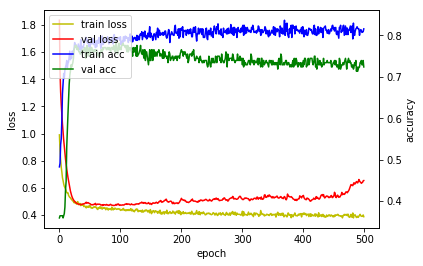

In [355]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')


acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')

lines, labels = loss_ax.get_legend_handles_labels()
lines2, labels2 = acc_ax.get_legend_handles_labels()
acc_ax.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

In [359]:
loss, acc = model.evaluate(X_test,y_test)

192/192 [==============================] - 0s 120us/sample - loss: 0.6529 - acc: 0.7240


In [361]:
print('test dataset의 loss는 {}, accuracy는 {}'.format(loss,acc))

test dataset의 loss는 0.6529422501722971, accuracy는 0.7239583134651184
